Let's look at a sample of $W$ boson candidates, particularly those that decay to an electron $e$ and a neutrino $\nu$. A selection has already been performed on the SingleElectron sample collected by the CMS Experiment in 2011. 

An event is kept if there is one (and only one) electron in the event that satisfies:
* $p_{t}$ > 20.0 GeV
* [More needed...]

We output the following information to a csv (comma-separated-variable) file:

Run,Event,pt,eta,phi,type,sigmaEtaEta,HoverE,Q,MET,phiMET

Where
* Run, Event are the run and event numbers, respectively
* pt is the transverse momentum $p_{t}$ of the electron
* eta ($\eta$) is the pseudorapidity of the electron
* phi is the $\phi$ angle of the electron direction
* type is either EB or EE: whether the electron is in the barrel or in the endcap
* sigmaEtaEta is weighted cluster rms along $\eta$
* HoverE is the HCAL energy / ECAL energy

Let's read in the csv file and calculate the transverse mass $M_{T}$, where 

$M_{T} = \sqrt{2p_{t}MET(1 - \cos{\Delta\phi})}$

and make a histogram of the results.

In [1]:
import csv
import math
import numpy

transverse_mass = []
met = []

with open('./data/Wenu_Run2011A.csv') as csvfile:
    
    reader = csv.DictReader(csvfile)
   
    for row in reader:

        type = row['type']
        sigmaEtaEta = float(row['sigmaEtaEta'])
        HoverE = float(row['HoverE'])
    
        if type == 'EB':
            if sigmaEtaEta > 0.01:
                continue
            if HoverE > 0.15:
                continue
        if type == 'EE':
            if sigmaEtaEta > 0.03:
                continue
            if HoverE > 0.07:
                continue
        
        pt = float(row['pt'])
        phi = float(row['phi'])
        MET = float(row['MET'])
        phiMET = float(row['phiMET'])
        
        MT = math.sqrt(2*pt*MET*(1-math.cos(phi-phiMET)))
        transverse_mass.append(MT)
        met.append(MET)
        
MT_hist = numpy.histogram(transverse_mass, bins=24, range=(0,120))
MET_hist = numpy.histogram(met, bins=24, range=(0,120))

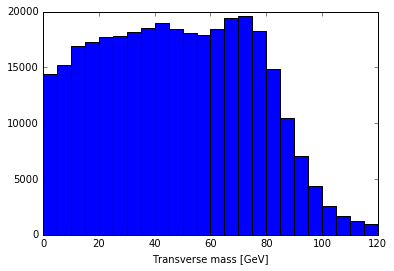

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = MT_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Transverse mass [GeV]')
plt.show()


In [16]:
len(transverse_mass)

332940